# 0- Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# 1- Loading Preprocessed Datasets

In [2]:
train_set = pd.read_csv('..\\data\\03_Processed\\preprocessed_train_set.csv')
X_train = train_set.drop('math score', axis=1)
y_train = train_set['math score']
test_set = pd.read_csv('..\\data\\03_Processed\\preprocessed_test_set.csv')
X_test = test_set.drop('math score', axis=1)
y_test = test_set['math score']
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((800, 16), (800,), (200, 16), (200,))

# 2- Choose the best model
the default parameters of each regressor model is a good sign to decide which model is the best fit to our case.

In [3]:
models = {
    "Linear Regressor": LinearRegression(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor": Lasso(),
    "ElasticNet Regressor": ElasticNet(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "Cat Boost Regressor": CatBoostRegressor(verbose=0),
    "XGBoost Regressor": XGBRegressor()
}

In [4]:
r2_scores = {}
for model_name in models.keys():
    models[model_name].fit(X_train, y_train)
    r2_scores[model_name] = r2_score(y_test, models[model_name].predict(X_test))

In [5]:
for model in r2_scores.keys():
    print(f"score of {model} is {r2_scores[model]}")

score of Linear Regressor is 0.8804332983749565
score of Ridge Regressor is 0.880532604834077
score of Lasso Regressor is 0.8254465092551198
score of ElasticNet Regressor is 0.7107869191368297
score of KNN Regressor is 0.7559513829301088
score of Decision Tree Regressor is 0.7285262005503448
score of Random Forest Regressor is 0.8491187999692792
score of Gradient Boost Regressor is 0.8723588730181839
score of Ada Boost Regressor is 0.8525997170861846
score of Cat Boost Regressor is 0.8504259342173254
score of XGBoost Regressor is 0.8212205171585083


In [6]:
print(f"best model based on r2 score: {max(r2_scores.keys(), key=r2_scores.get)}")


best model based on r2 score: Ridge Regressor


so the best fitting regressor model to use in this case<mark style="background-color:green;"> Ridge Regressor </mark>.

# 3- Tuning the hyperparameter of the chosen regressor

## Build param dictionary to use in grid search

In [7]:
param = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

## Search and print the best parameter and best score

In [8]:
grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param,
    n_jobs=-1,
    cv=5,
    scoring='r2'
)

# 3. Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# After fitting, you can get the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Best Parameters: {'alpha': 1, 'solver': 'sparse_cg'}
Best R2 Score: 0.8686052316053777


# 4- Use the best hypertuned regressor

In [9]:
regressor = grid_search.best_estimator_
regressor

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'sparse_cg'
,positive,False
,random_state,None


In [10]:
y_pred = regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.8805323436033881


## Visualize outputs (test prediction)

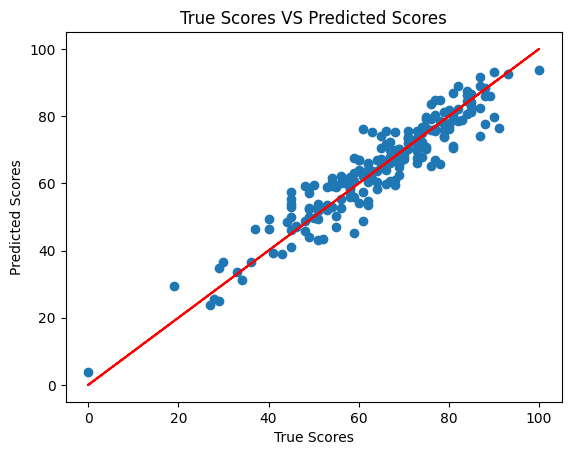

In [11]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Scores')
plt.ylabel('Predicted Scores')
plt.title('True Scores VS Predicted Scores')
plt.show()

the data points are very close to actual values(red line).

## Visualize Residuals

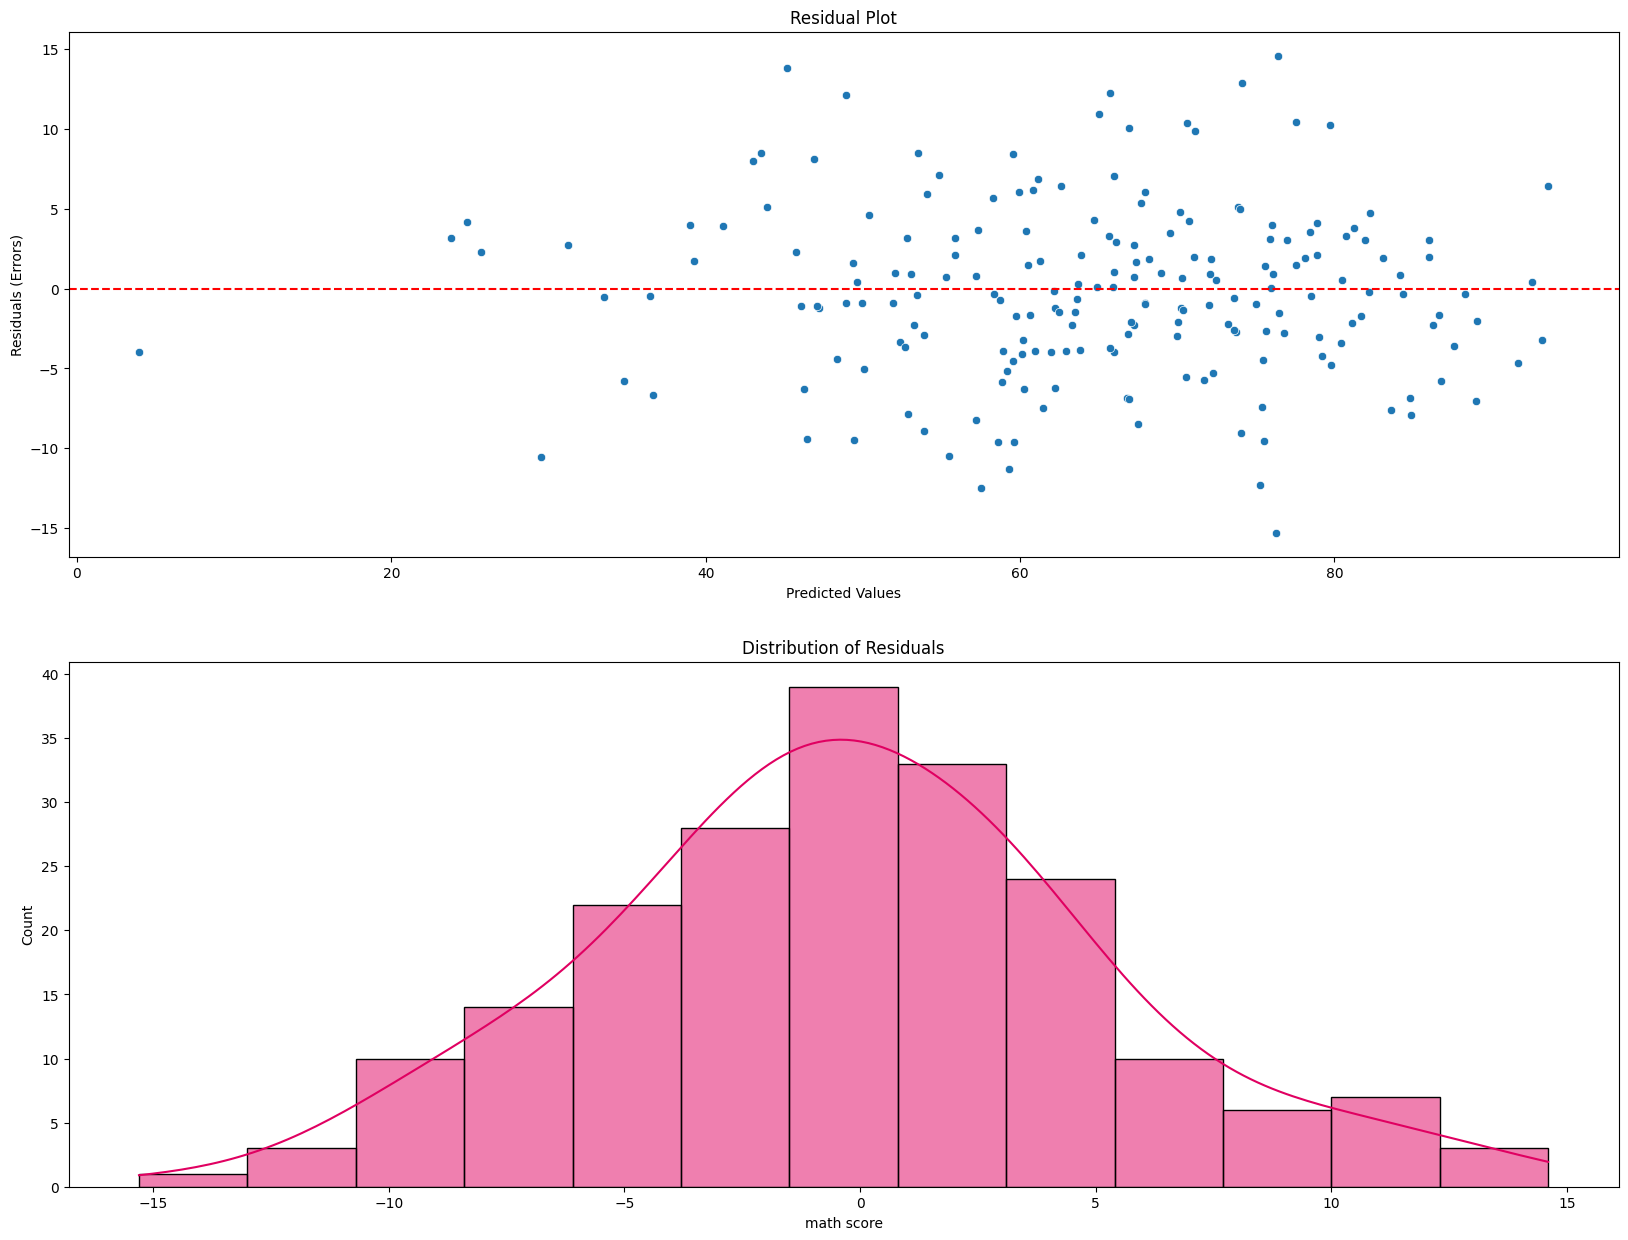

In [12]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(20, 15))

plt.subplot(2, 1, 1)

sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')
# plt.show()

plt.subplot(2, 1, 2)

sns.histplot(residuals, kde=True, color="#e00061")
plt.title('Distribution of Residuals')
plt.show()

residuals are almost symetric, so there is no problem. (expected errors)